### Student Information
Name: 李季軒

Student ID: B10902111

GitHub ID: LEE-CHI-HSUAN

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [100]:
### Begin Assignment Here

# Section 2: Same process from Lab1-Master

## Data preparation

In [101]:
# We need new modules to download the data from Hugging Face
%pip install fsspec huggingface_hub -q

Note: you may need to restart the kernel to use updated packages.


In [102]:
# download the data
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

Let's take a look at the data we just downloaded.

In [103]:
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


## Handle Missing Values and Duplicate Data

### Identify missing values

In [104]:
# borrow from helpers
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

df.isnull().apply(check_missing_values)

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


Fortunately, there is no missing values.

### Identify duplicate data

In [105]:
df.duplicated().sum()

1

We found a duplicate data. Now we have to remove it.

In [106]:
print(f"Number of examples before removing: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Number of examples after removing: {len(df)}")

Number of examples before removing: 1500
Number of examples after removing: 1499


## Data Preprocessing

### Sampling

I'm not sure if this needs to be included in the homework.

In [107]:
sampled_df = df.sample(500)

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

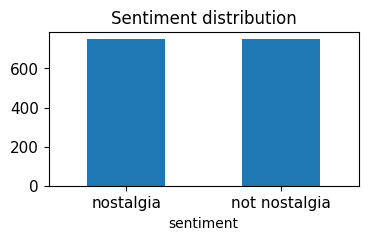

In [108]:
print(df.sentiment.value_counts())

# plot barchart for X
df.sentiment.value_counts().plot(kind = 'bar',
                                 title = 'Sentiment distribution',    
                                 rot = 0, fontsize = 11, figsize = (4,2))

sentiment
nostalgia        250
not nostalgia    250
Name: count, dtype: int64


<Axes: title={'center': 'Sampled Sentiment distribution'}, xlabel='sentiment'>

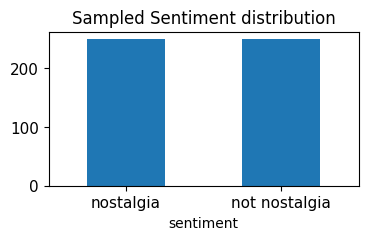

In [109]:
print(sampled_df.sentiment.value_counts())

# plot barchart for X
sampled_df.sentiment.value_counts().plot(kind = 'bar',
                                         title = 'Sampled Sentiment distribution',    
                                         rot = 0, fontsize = 11, figsize = (4,2))

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

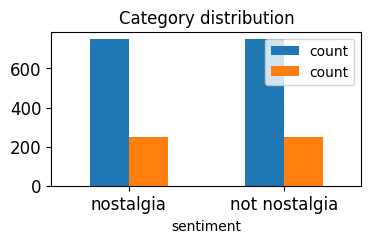

In [110]:
pd.concat([df.sentiment.value_counts().to_frame(), sampled_df.sentiment.value_counts().to_frame()], axis=1) \
  .plot(kind = 'bar',title = 'Category distribution', rot = 0, fontsize = 12, figsize = (4,2))

### Feature Creation

In [111]:
import nltk

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

df['unigrams'] = df.comment.apply(tokenize_text)

The dataframe has got a new column.

In [112]:
df.head()

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m..."


### Document-Term Matrix Creation

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix

Inspect the document-term matrix.

In [114]:
print(f"{df_counts.shape = }")
count_vect.get_feature_names_out()[0:10]

df_counts.shape = (1499, 3730)


array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

Visualize term distribution.

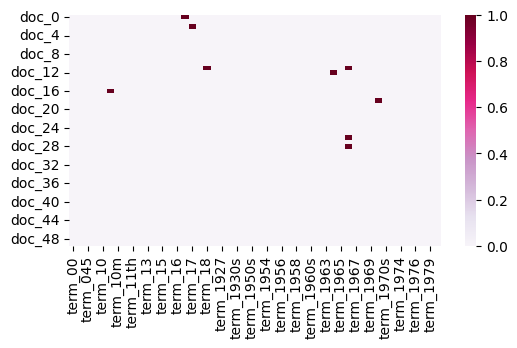

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns


def plot_term_document_matrix(doc_start, doc_end, term_start, term_end):
    plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[term_start:term_end]]
    plot_y = ["doc_"+ str(i) for i in list(df.index)[doc_start:doc_end]]
    plot_z = df_counts[doc_start:doc_end, term_start:term_end].toarray()

    # Create a pandas DataFrame for plotting
    df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
    # Create a figure and axes for the heatmap
    plt.subplots(figsize=(6, 3))
    # Generate a heatmap using seaborn
    ax = sns.heatmap(df_todraw,
                    cmap="PuRd", # Set the colormap
                    vmin=0, vmax=1, # Set the minimum and maximum values for the color scale
                    annot=False) # Disable annotations on the heatmap

plot_term_document_matrix(0, 50, 0, 50)

plot_term_document_matrix(0, 50, 0, 50)

In [116]:
# explore the use of analyzer
analyzer = count_vect.build_analyzer()
print(analyzer(df.comment[0]))

['he', 'was', 'singer', 'with', 'golden', 'voice', 'that', 'love', 'to', 'hear', 'all', 'the', 'time', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', 'although', 'we', 'have', 'many', 'singers', 'now', 'but', 'can', 'vouch', 'for', 'jim', 'reeves', 'all', 'the', 'time', 'you', 'feel', 'relaxed', 'emotional', 'and', 'loving', 'thank', 'you', 'lord', 'for', 'his', 'life']


### Attribute Transformation / Aggregation

Draw a bar chart of term frequency. Only the first 100 terms are shown.

In [117]:
import numpy as np

# Calculate the term frequencies by summing the counts of each term across all documents.
# And then convert to a np.array
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

C:\Users\james\AppData\Local\Temp\ipykernel_17244\2397999376.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:n_terms], rotation = 90);


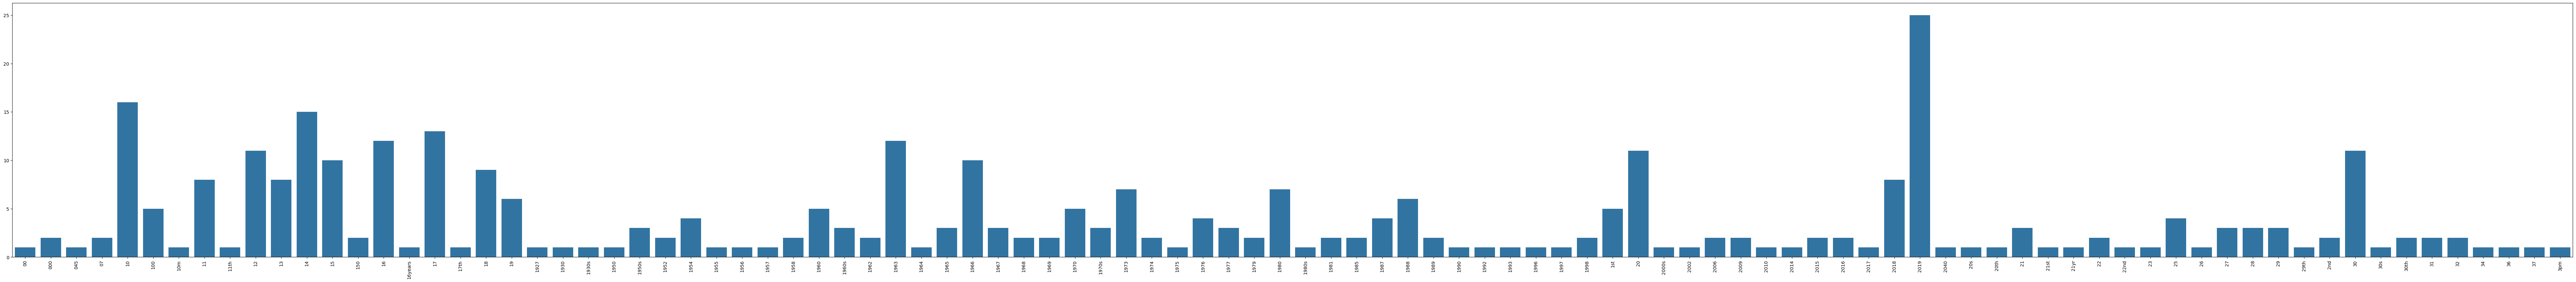

In [118]:
n_terms = 100
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:n_terms], 
                y=term_frequencies[:n_terms])
g.set_xticklabels(count_vect.get_feature_names_out()[:n_terms], rotation = 90);

Sort the frequency from high to low.

C:\Users\james\AppData\Local\Temp\ipykernel_17244\3717162198.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:n_terms], rotation = 90);


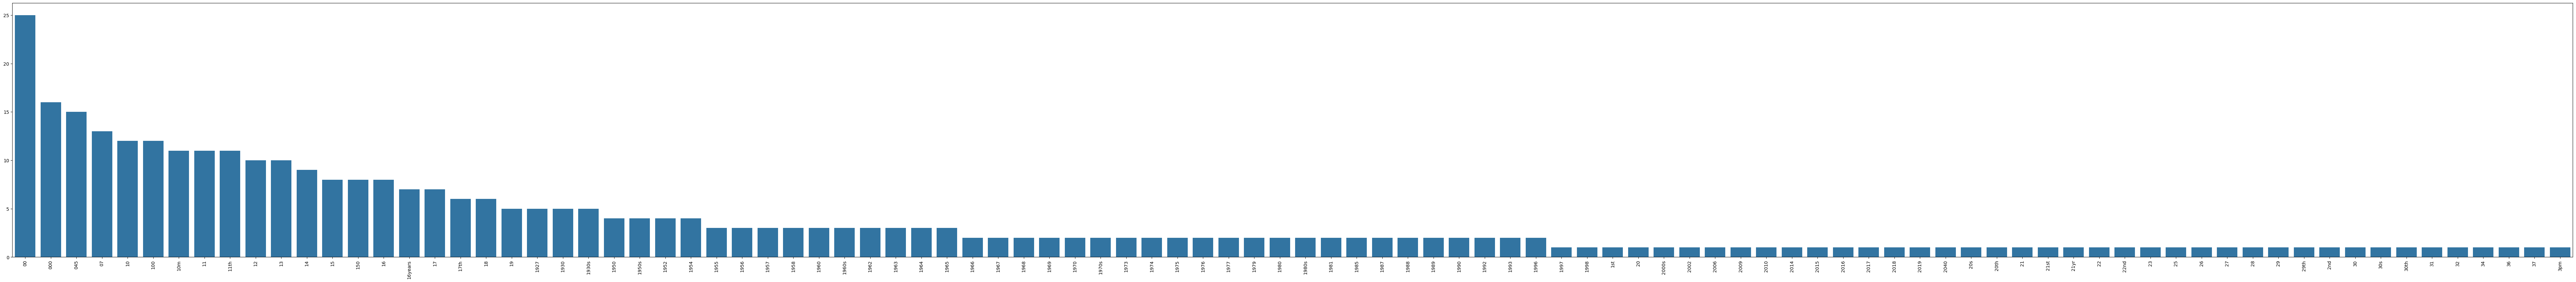

In [119]:
sorted_idx = np.argsort(term_frequencies[:n_terms])[::-1]
n_terms = 100
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:n_terms][sorted_idx], 
                y=term_frequencies[:n_terms][sorted_idx])
g.set_xticklabels(count_vect.get_feature_names_out()[:n_terms], rotation = 90);

### Finding frequent patterns

#### Split data by sentiment

In [120]:
sentiments = ["not nostalgia", "nostalgia"]
dfs = {sentiment: df[df.sentiment == sentiment] for sentiment in sentiments}

Take a look.

In [121]:
dfs["not nostalgia"].head()

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
8,not nostalgia,Wherever you are you always in my heart,"[Wherever, you, are, you, always, in, my, heart]"
9,not nostalgia,Elvis will always be number one no one can com...,"[Elvis, will, always, be, number, one, no, one..."
10,not nostalgia,ill bet if they begin to play this song on the...,"[ill, bet, if, they, begin, to, play, this, so..."


In [122]:
dfs["nostalgia"].head()

,sentiment,comment,unigrams
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m..."
5,nostalgia,"Every time I heard this song as a child, I use...","[Every, time, I, heard, this, song, as, a, chi..."
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...","[My, dad, loved, listening, to, Jim, Reeves, ,..."


They have been properly seperated.

#### Create term-document matrix

In [123]:
def create_term_document_df(df):
    """
    Creates a term-document matrix from a DataFrame containing text data.

    Args:
        df (pandas.DataFrame): A DataFrame with a 'comment' column containing text data.

    Returns:
        pandas.DataFrame: A DataFrame representing the term-document matrix. Rows
        represent documents, columns represent words, and values are word counts.
    """
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df.comment)  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

term_document_dfs = {sentiment: create_term_document_df(dfs[sentiment]) for sentiment in sentiments}

In [124]:
term_document_dfs["not nostalgia"]

,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [125]:
term_document_dfs["nostalgia"]

,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Filter top and bottom words

In [126]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

for sentiment in sentiments:
    print(f'\nFor {sentiment = } we filter the following words:')
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(term_document_dfs[sentiment])


For sentiment = 'not nostalgia' we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For sentiment = 'nostalgia' we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
ro

#### FPGrowth

Create transaction data.

In [127]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment}.csv', '>=', 1)

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


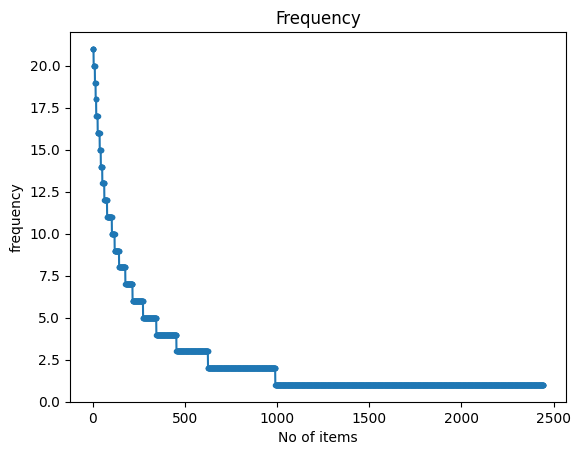

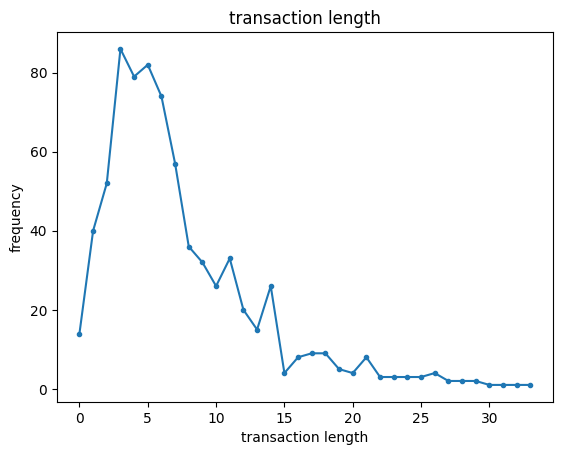

In [128]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


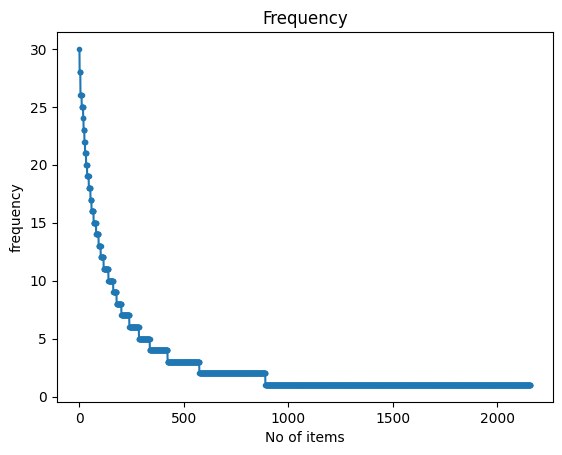

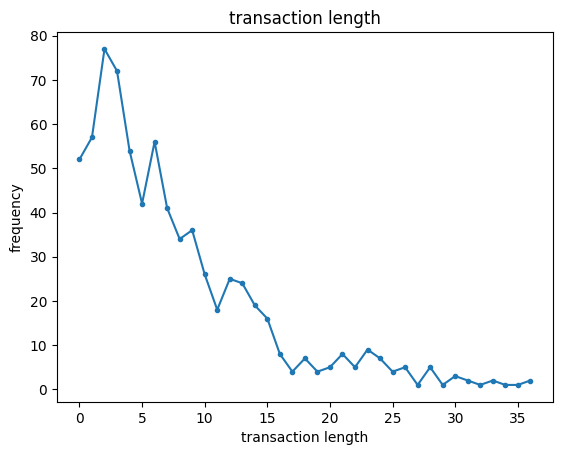

In [129]:
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Obeserving the above graphs, I decided the minimum support to be 2.

In [130]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=2

frequent_patterns_dfs = {}
for sentiment in sentiments:
    obj = alg.FPGrowth(iFile=f'td_freq_db_{sentiment}.csv', minSup=minSup)
    obj.mine()
    frequent_patterns_dfs[sentiment] = obj.getPatternsAsDataFrame()
    
    print(f'Total No of patterns: {len(frequent_patterns_dfs[sentiment])}') #print the total number of patterns
    print(f'Runtime: {obj.getRuntime()}') #measure the runtime
    obj.save(f'freq_patterns_{sentiment}_minSup{minSup}.txt') #save the patterns
    print(frequent_patterns_dfs[sentiment])

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2113
Runtime: 0.03621411323547363
          Patterns  Support
0             lord        2
1          relaxed        2
2              2nd        2
3         2nd came        2
4            marry        2
...            ...      ...
2108       classic       21
2109          them       21
2110    them every        4
2111        lyrics       21
2112  lyrics every        3

[2113 rows x 2 columns]
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 3805
Runtime: 0.04318118095397949
           Patterns  Support
0            gentle        2
1         gentle no        2
2             jesus        2
3        jesus town        2
4               job        2
...             ...      ...
3800           will       28
3801        will go        2
3802  will favorite        3
3803             go       28
3804       favorite       30

[3805 rows

#### Find unique patterns

In [131]:
from collections import Counter

def find_unique_elements(lst):
    # Count the occurrences of each element
    element_counts = Counter(lst)
    # Filter and return elements that appear exactly once
    return [element for element, count in element_counts.items() if count == 1], \
           [element for element, count in element_counts.items() if count != 1]

all_patterns = frequent_patterns_dfs["nostalgia"].Patterns.to_list() + frequent_patterns_dfs["not nostalgia"].Patterns.to_list()
unique_patterns, discarded_patterns = find_unique_elements(all_patterns)

Take a glimpse of the non-unique patterns

In [132]:
print(discarded_patterns)

['gentle', 'job', 'leave', 'simple', 'touches', 'seen', 'told', 'straight', 'does', 'put', 'face', 'attention', 'beatles', 'work', 'imagine', 'side', 'motown', 'black', 'college', 'guys', 'steve', 'winwood', 'remains', 'listens', 'maybe', 'memorable', 'ask', 'men', 'guess', 'melancholy', 'knows', 'moment', 'less', 'looks', '25', 'gets', 'hello', 'list', 'orbison', 'orbison roy', 'pictures', 'ya', 'style', 'quality', 'superb', 'roll', 'roll rock', 'unbelievable', 'definitely', 'far', 'presley', 'presley elvis', 'loves', 'tried', 'own', 'magic', 'dream', 'realize', 'future', 'spend', 'especially', 'pleasure', 'ruby', 'fan', 'looked', 'brewer', 'teresa', 'whole', 'eckstine', 'eckstine billy', 'green', 'voices', 'experience', 'million', 'try', 'enjoy', 'dickie', 'broken', 'missing', 'garbage', 'davis', 'human', 'film', 'second', 'meaning', 'waiting', 'shame', 'due', 'history', 'women', 'performed', 'wanted', 'totally', 'incredible', 'sometimes', 'perform', 'beat', 'seems', 'change', 'means

#### Augment Data with New features

In [133]:
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary
analyzer = count_vect.build_analyzer()

# Tokenize the sentences into sets of unique words
#df['tokenized_comment'] = df['comment'].str.split().apply(set) # case sensitive
df['tokenized_comment'] = df['comment'].apply(analyzer).apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=unique_patterns)

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in unique_patterns:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,wonderful,wonderful well,thanks,thanks lyrics,thanks every,thanks days,every,loved,them every,lyrics every
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
augmented_df.transpose().duplicated().sum()


3374

Notice that there are duplicate columns. This is because we concatenated original terms with unique terms and the latter overlaps the former.

## Dimension Reduction

Applying dimensionality reduction with only the document-term frequency data

In [135]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

Plot the results in subplots.

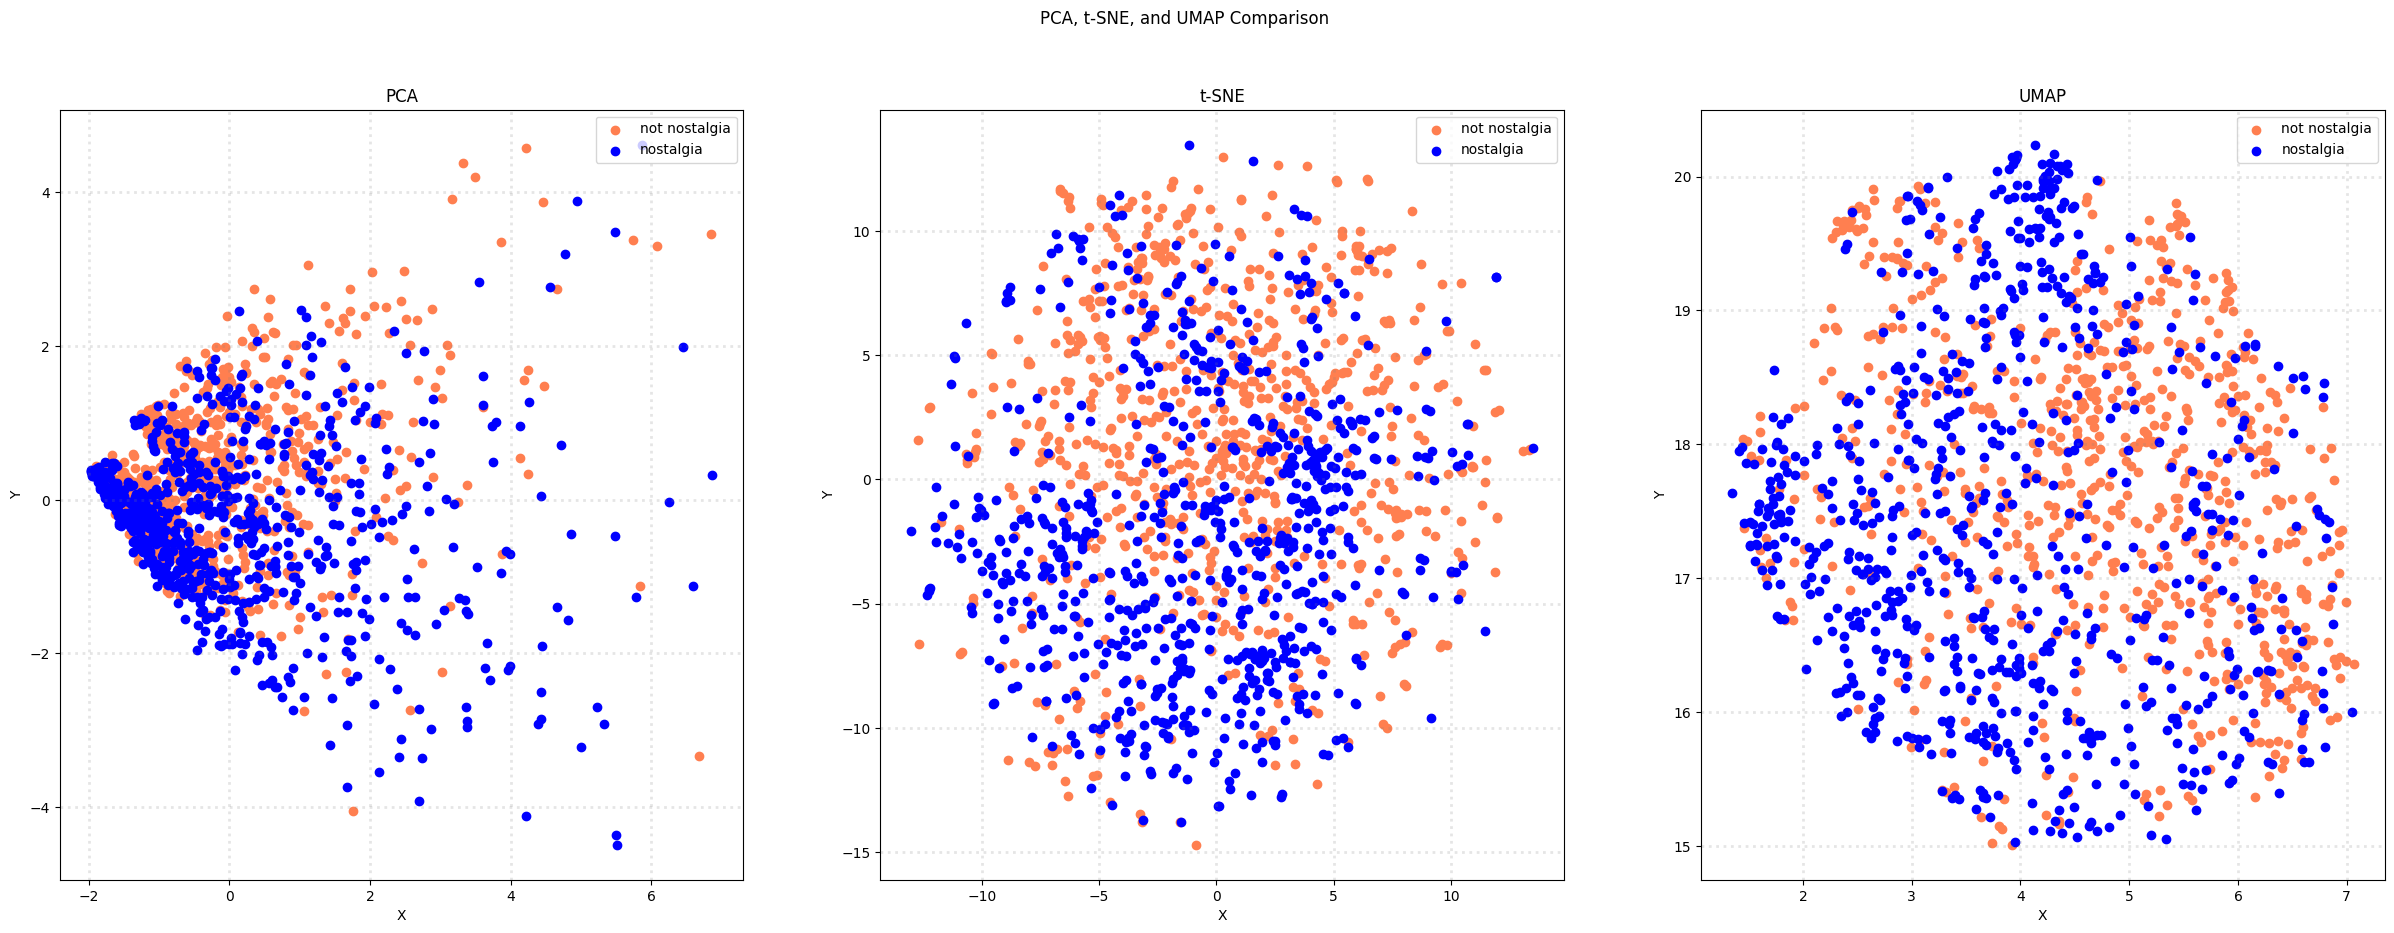

In [136]:

col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

Applying dimensionality reduction with both the document-term frequency data and the pattern derived data

In [137]:
#This might take a couple of minutes to execute

# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

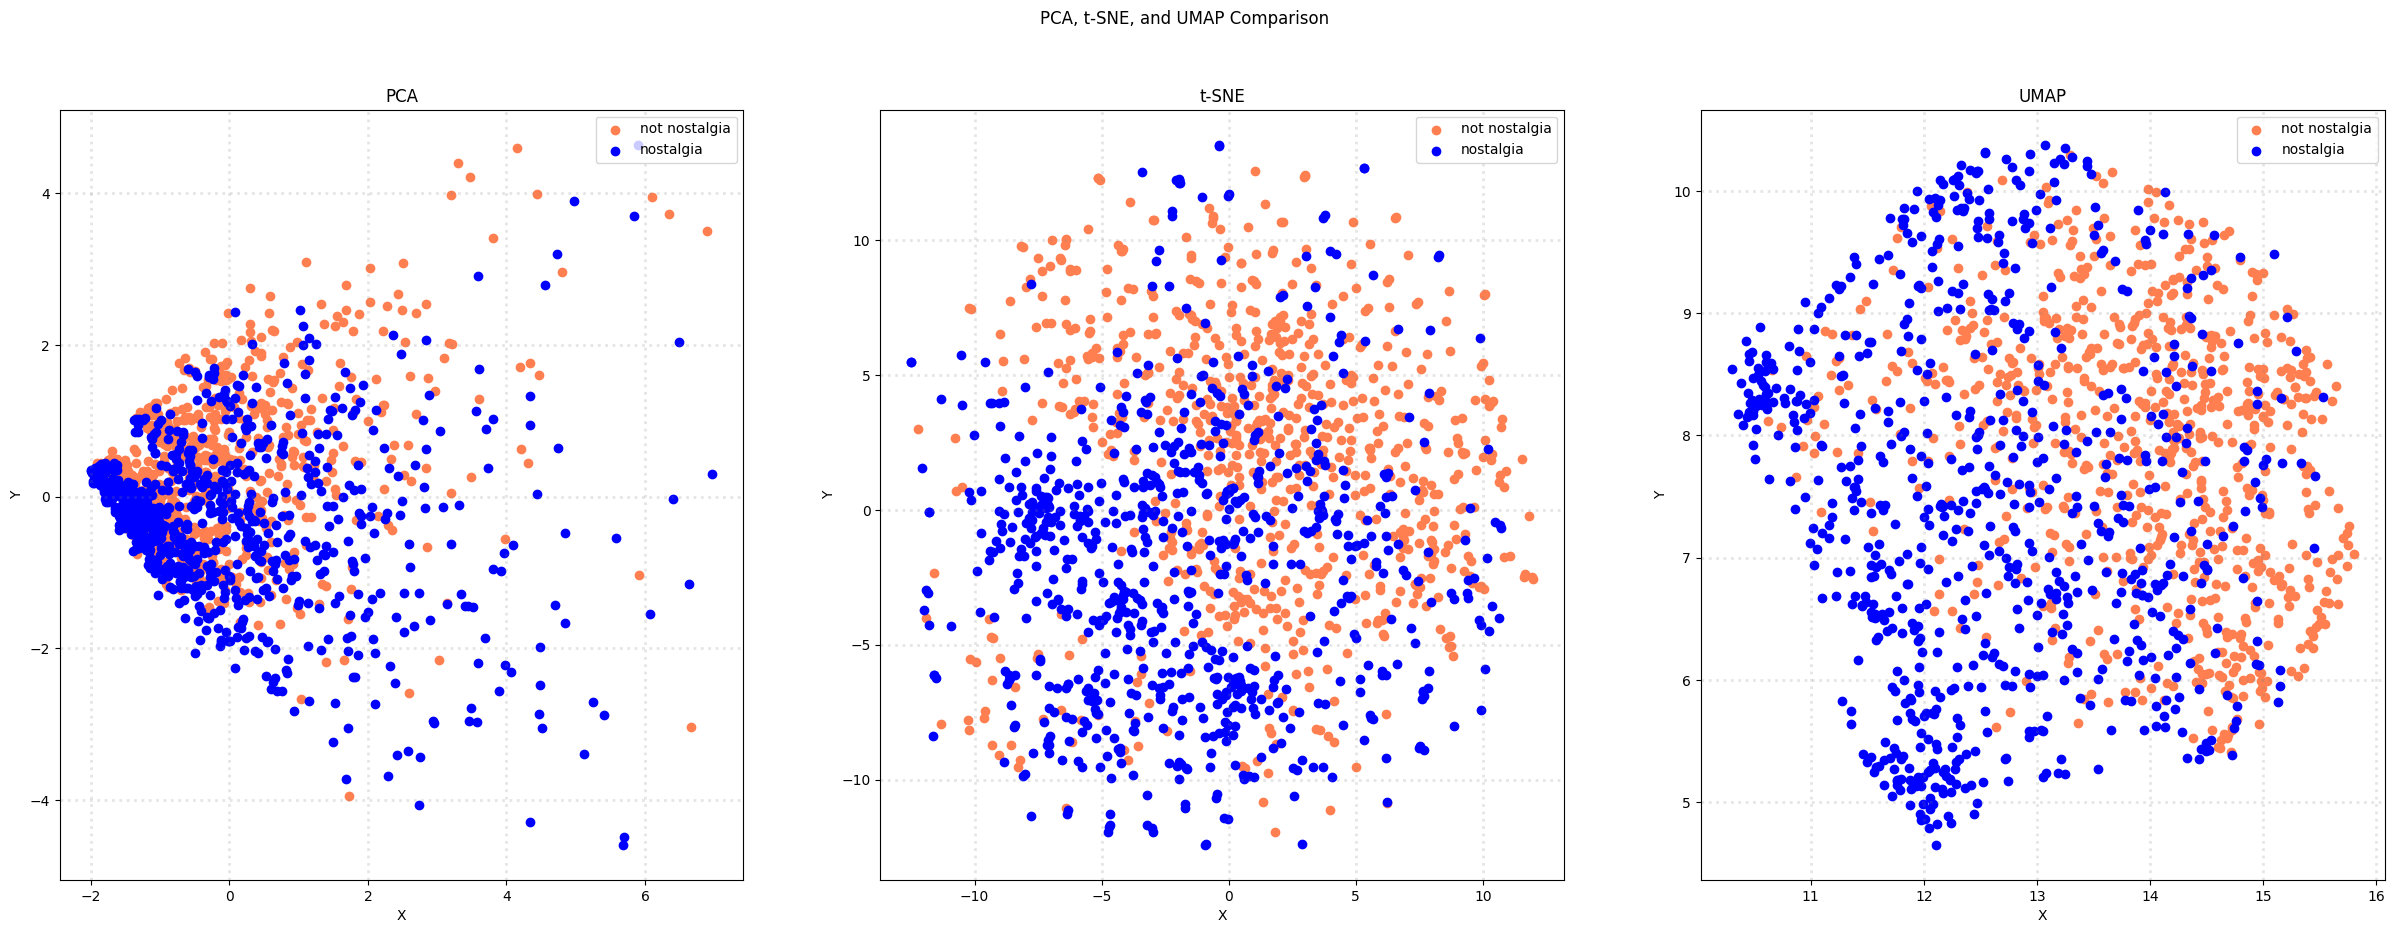

In [138]:

col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

## Discretization and Binarization

In [139]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)
df['bin_sentiment'] = mlb.transform(df['sentiment']).tolist()

In [140]:
df.head()

,sentiment,comment,unigrams,tokenized_comment,bin_sentiment
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{in, time, love, reeves, still, all, many, rel...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{love, never, still, when, ever, voice, his, m...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{love, reeves, never, town, little, like, song...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{in, blessing, day, 1st, all, some, when, are,...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{everyday, mum, listening, my, played, songs, ...",[0]


## Data Exploration

In [141]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]['comment']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [142]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [143]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print(f"Cosine Similarity using count bw 1 and 2: {cos_sim_count_1_2}")
print(f"Cosine Similarity using count bw 1 and 3: {cos_sim_count_1_3}")
print(f"Cosine Similarity using count bw 2 and 3: {cos_sim_count_2_3}")

print(f"Cosine Similarity using count bw 1 and 1: {cos_sim_count_1_1}")
print(f"Cosine Similarity using count bw 2 and 2: {cos_sim_count_2_2}")
print(f"Cosine Similarity using count bw 3 and 3: {cos_sim_count_3_3}")

Cosine Similarity using count bw 1 and 2: [[0.03217447]]
Cosine Similarity using count bw 1 and 3: [[0.02786391]]
Cosine Similarity using count bw 2 and 3: [[0.]]
Cosine Similarity using count bw 1 and 1: [[1.]]
Cosine Similarity using count bw 2 and 2: [[1.]]
Cosine Similarity using count bw 3 and 3: [[1.]]


## Data Classification

### Model with original data

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [145]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

In [146]:
X_train.head()

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
X_test.head()

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



### Model with augmented data

In [149]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9222222222222223

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.9125    0.9399    0.9260       233
not nostalgia     0.9333    0.9032    0.9180       217

     accuracy                         0.9222       450
    macro avg     0.9229    0.9216    0.9220       450
 weighted avg     0.9225    0.9222    0.9222       450



# Section 3

## Data Visualization

### Word Cloud

In [150]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [151]:
from wordcloud import WordCloud

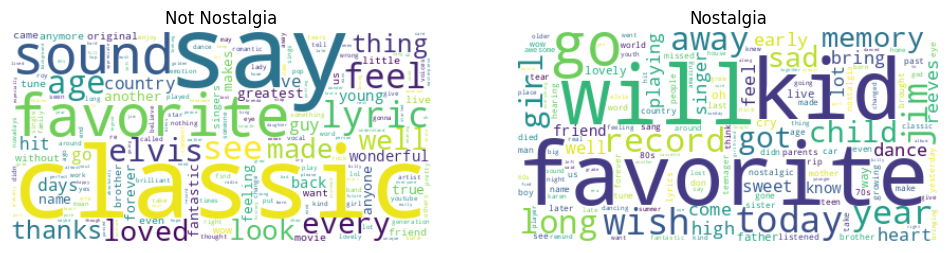

In [152]:
# concatenate words
word_count = term_document_dfs["not nostalgia"].sum()
all_words = []
for term in word_count.index:
    all_words.extend([term] * word_count[term])
all_words = ' '.join(all_words)              
# Generate a word cloud image
wordcloud_not = WordCloud(background_color='white', collocations=False).generate(all_words)

# concatenate words
word_count = term_document_dfs["nostalgia"].sum()
all_words = []
for term in word_count.index:
    all_words.extend([term] * word_count[term])
all_words = ' '.join(all_words)               
# Generate a word cloud image
wordcloud_nos = WordCloud(background_color='white', collocations=False).generate(all_words)

# Show Images
fig, axes = plt.subplots(1, 2, figsize=(12, 8))  # Create 3 subplots for PCA, t-SNE, and UMAP

axes[0].imshow(wordcloud_not, interpolation="bilinear")
axes[0].set_title("Not Nostalgia")
axes[0].axis("off")

axes[1].imshow(wordcloud_nos, interpolation="bilinear")
axes[1].set_title("Nostalgia")
axes[1].axis("off")
plt.show()

## TF-IDF

In [153]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(df.comment)

tfidf_matrix = vectorizer.transform(df.comment)
print(tfidf_matrix[0])

  (0, 15)	0.23196919224604873
  (0, 214)	0.14662969149477417
  (0, 233)	0.19791015577918225
  (0, 245)	0.18618228057875305
  (0, 258)	0.11457641683536417
  (0, 323)	0.10633155023896874
  (0, 573)	0.09498662184332274
  (0, 593)	0.10489308459264358
  (0, 907)	0.11318589137806082
  (0, 1125)	0.20407559920901155
  (0, 1249)	0.19852539212933534
  (0, 1272)	0.14572091180719218
  (0, 1347)	0.17046172334567541
  (0, 1470)	0.17742470356320433
  (0, 1512)	0.09515621480982876
  (0, 1591)	0.09690622871170591
  (0, 1598)	0.10512815802912398
  (0, 1606)	0.11892115591975148
  (0, 1651)	0.22761435073116082
  (0, 1733)	0.06689075657536095
  (0, 1833)	0.14572091180719218
  (0, 1964)	0.12694515867382045
  (0, 2018)	0.19852539212933534
  (0, 2028)	0.08426437228313143
  (0, 2035)	0.17742470356320433
  (0, 2082)	0.11380717536558041
  (0, 2328)	0.2116889402153788
  (0, 2341)	0.061599247801622355
  (0, 2671)	0.1538873661958118
  (0, 2688)	0.21086850367991766
  (0, 2973)	0.13337780025660986
  (0, 2974)	0.15632

### Explore the vectorizer

In [154]:
vectorizer.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

### Transform to DataFrame

In [155]:
tf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [156]:
tf_df

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


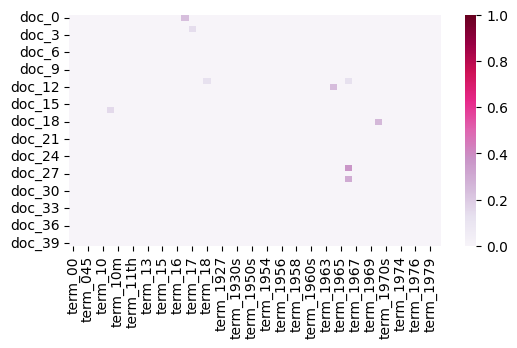

In [157]:
def plot_matrix(df, doc_start, doc_end, term_start, term_end):
    plot_x = ["term_" + str(i) for i in vectorizer.get_feature_names_out()[term_start:term_end]]
    plot_y = ["doc_" + str(i) for i in list(df.index)[doc_start:doc_end]]
    plot_z = df.iloc[doc_start:doc_end, term_start:term_end].to_numpy()

    df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
    plt.subplots(figsize=(6, 3))
    ax = sns.heatmap(df_todraw,
                    cmap="PuRd",
                    vmin=0, vmax=1, annot=False)
    
plot_matrix(tf_df, 0, 40, 0, 50)

## Build A Naive Bayes Classifier

In [158]:
X_train, X_test, y_train, y_test = train_test_split(tf_df, df['sentiment'], test_size=0.3, random_state=42)

In [159]:
print(X_train.shape)
print(X_test.shape)

(1049, 3730)
(450, 3730)


Train. Because this is a 2-class classification problem, we use `BernoulliNB`.

In [160]:
from sklearn.naive_bayes import BernoulliNB

nb_classifier_tf = BernoulliNB()
nb_classifier_tf.fit(X_train, y_train)

BernoulliNB()

Test.

In [161]:
# Make predictions on the test set
y_pred = nb_classifier_tf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8844444444444445

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8521    0.9399    0.8939       233
not nostalgia     0.9275    0.8249    0.8732       217

     accuracy                         0.8844       450
    macro avg     0.8898    0.8824    0.8835       450
 weighted avg     0.8885    0.8844    0.8839       450



# Section 4

## Calculation of term frequency

When calculating term ducument matrix, the master code uses two forms to store the variables. The first one is a sparse matrix (`X_count`) returned by `CountVectorizer().transform`. However, A sparse matrix is hard to understand when we use `print` to show it and it is very slow to compute the sum of per-document frequency.

In [ ]:
term_frequencies = []
for j in range(X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

The second way is converting the sparse matrix to an `numpy.array` or a `pandas.DataFrame`, which is more intuative and convenient for post-processing. A significant speed up can be perceived when we compute the term frequencies as below.

In [ ]:
def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

X_counts_df = create_term_document_df(X)
term_frequencies = X_counts_df.sum(axis=0)

## Tokenize

Several ways of tokenization were introduced in the lab, and I noticed that they have some difference that can affect the result. The first is implemented by utilizing `nltk`.

In [ ]:
df['unigrams'] = df.comment.apply(dmh.tokenize_text)

And then we have the analyzer of a `CountVectorizer()`.

In [ ]:
count_vect = CountVectorizer()
analyzer = count_vect.build_analyzer()
analyzer("text")

Finally, the most naive method that doesn't use any external package.

In [ ]:
X['text'].str.split().apply(set)

One difference between the second method and the others is that the former turn every characters to lower cases while the latters do not. One problem can stem from this because we create term-document by a `CountVectorizer()` and then identify patterns. If later we use other method to tokenize a text, we might failed to identify some patterns in it. The following code snippet shows the influence of upper/lower cases.

In [ ]:
Sentence1 = "Hello world"
sentence1_words = set(Sentence1.split())
Sentence2 = "hello world"
sentence2_words = set(Sentence2.split())
pattern = "hello world"
pattern_words = set(pattern.split())
print(f"{pattern_words.issubset(sentence1_words) = }")
print(f"{pattern_words.issubset(sentence2_words) = }")

A simple solution is use only a `CountVectorizer()` to conduct tokenizaion.

## Duplicate Term/Pattern

In the lab, we augmented the term-document matrix by appending new features. Those features are unique patterns of each categorys. A pattern can be a single word or a set of words. Spontaneously, single-word patterns are a subset of terms, so those features are likely to be redundant features because they already exist in the term-document matrix. We can spot duplicate festure by executing `augmented_df.transpose().duplicated().sum()` and remove them by executing `augmented_df = augmented_df.T.drop_duplicates()`.

## Trivial

In [ ]:
# A line copy from the master note book.
X.isnull().apply(lambda x: dmh.check_missing_values(x))
# But we don't need to use a lambda function.
X.isnull().apply(dmh.check_missing_values)
# They are the same.